<a href="https://colab.research.google.com/github/gabrieleantonini00/Analysis-of-Financial-Time-Series/blob/main/FTS_AutoCorrelation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.arima_process import ArmaProcess

# Loading Data - IBM Stocks

In [30]:
import pandas as pd

# URL of the dataset (monthly IBM returns)
url = "https://faculty.chicagobooth.edu/-/media/faculty/ruey-s-tsay/teaching/fts3/m-ibm3dx2608.txt"

# Load the dataset
df = pd.read_csv(url, sep=r'\s+')

# Rename first column to 'Date'
df = df.rename(columns={df.columns[0]: "Date"})

# Convert YYYYMMDD format to datetime
df["Date"] = pd.to_datetime(df["Date"], format="%Y%m%d")

df = df.set_index("Date")
print(df.info())
print(df.head())
ibm = df["ibmrtn"]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 996 entries, 1926-01-30 to 2008-12-31
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ibmrtn  996 non-null    float64
 1   vwrtn   996 non-null    float64
 2   ewrtn   996 non-null    float64
 3   sprtn   996 non-null    float64
dtypes: float64(4)
memory usage: 38.9 KB
None
            ibmrtn   vwrtn   ewrtn   sprtn
Date                                      
1926-01-30 -0.0104  0.0007  0.0232  0.0225
1926-02-27 -0.0245 -0.0334 -0.0535 -0.0440
1926-03-31 -0.1156 -0.0643 -0.0968 -0.0591
1926-04-30  0.0898  0.0384  0.0329  0.0227
1926-05-28  0.0369  0.0122  0.0010  0.0077


# Simple Returns

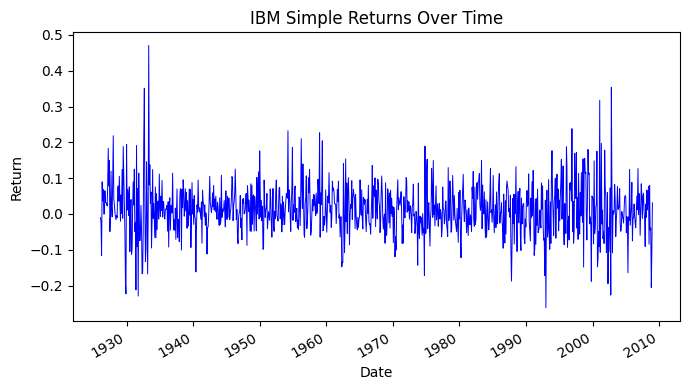

In [31]:
plt.figure(figsize=(7,4))
ibm.plot(color='blue', linewidth=0.7)
plt.title('IBM Simple Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Return')
plt.tight_layout()
plt.savefig('IBM_simple_returns.png', dpi=1200, bbox_inches='tight', transparent=True)
plt.show()

# Ljung-Box test

In [32]:
# The Box-Ljung test is used to check for the presence of autocorrelation in a
# time series up to a specified number of lags (in this case, 5 lags).
# X-squared = 3.3682: This is the test statistic, which follows a chi-squared distribution with df = 5 degrees of freedom.
# p-value = 0.6434: A fairly high value, much greater than the typical 5% significance level (0.05).
# The null hypothesis of the test states that there is no autocorrelation in the first 5 lags of the IBM return series.
# Since the p-value is quite high (0.6434), we fail to reject the null
# hypothesis. This suggests that there is no significant evidence of
# autocorrelation in IBM’s monthly simple returns up to the fifth lag.

lb_simple = acorr_ljungbox(ibm, lags=[5], return_df=True)
print("Ljung-Box test (Q5) - Simple Returns:\n", lb_simple)

Ljung-Box test (Q5) - Simple Returns:
    lb_stat  lb_pvalue
5   3.3682     0.6434


# Log IBM returns

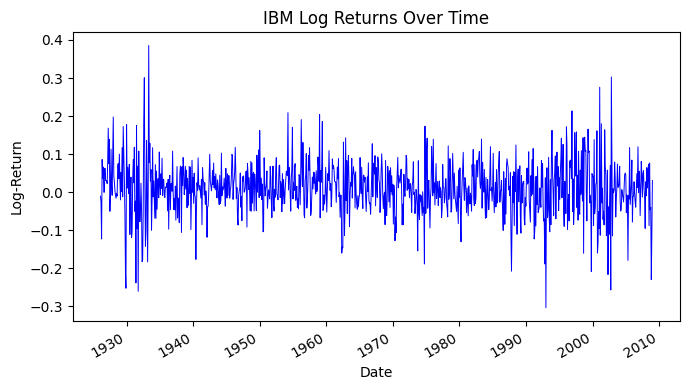

In [33]:
log_ibm = np.log(1 + ibm)

# Plot log returns
plt.figure(figsize=(7,4))
log_ibm.plot(color='blue', linewidth=0.7)
plt.title('IBM Log Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Log-Return')
plt.tight_layout()
plt.savefig('IBM_log_returns.png', dpi=1200, bbox_inches='tight', transparent=True)
plt.show()

# Ljung-Box test

```
# This is formatted as code
```



In [35]:
# Ljung-Box test for log returns
lb_log = acorr_ljungbox(log_ibm, lags=[5], return_df=True)
print("Ljung-Box test (Q5) - Log Returns:\n", lb_log)

Ljung-Box test (Q5) - Log Returns:
    lb_stat  lb_pvalue
5   3.5236     0.6198


In [36]:
# The null hypothesis states that there is no autocorrelation in the first 5
# lags of the logarithmic return series.
# The results for both simple and logarithmic returns are quite similar:
# in both cases, the p-value is high, suggesting a lack of significant autocorrelation.
# This is expected since logarithmic returns tend to have similar statistical
# properties to simple returns, especially over short time horizons

The lack of significant autocorrelation suggests that past returns do not provide predictive power for future returns, aligning with the Efficient Market Hypothesis (EMH).

# ACF

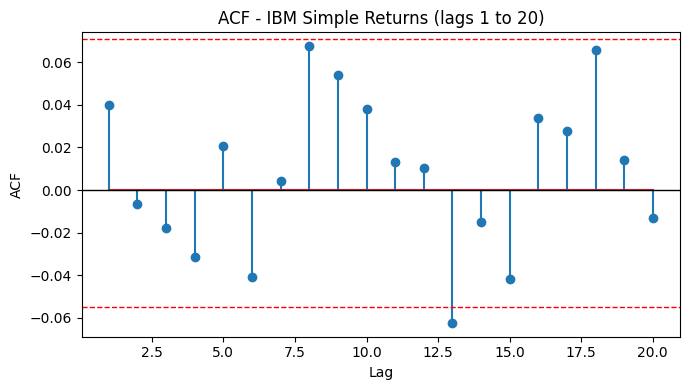

In [37]:
# Parameters
lags = 20

# Compute ACF with confidence intervals
acf_vals, confint = acf(ibm, nlags=lags, alpha=0.05)

# Plot without lag 0
plt.figure(figsize=(7,4))
plt.stem(range(1, lags+1), acf_vals[1:])  # skip lag 0
plt.axhline(0, color='black', linewidth=1)

# Confidence intervals (horizontal dashed lines)
plt.axhline(confint[1:,0].mean(), color='red', linestyle='dashed', linewidth=1)
plt.axhline(confint[1:,1].mean(), color='red', linestyle='dashed', linewidth=1)

plt.title(f'ACF - IBM Simple Returns (lags 1 to {lags})')
plt.xlabel("Lag")
plt.ylabel("ACF")
plt.tight_layout()
plt.savefig('ACF_simple_returns_no0.png', dpi=1200, bbox_inches='tight', transparent=True)
plt.show()

In [39]:
# Build table but skip lag 0
acf_simple_table = pd.DataFrame({
    'Lag': np.arange(1, len(acf_vals)),   # start from 1
    'ACF': acf_vals[1:],                  # skip lag 0
    'Lower_95%': confint[1:,0],
    'Upper_95%': confint[1:,1]
})

print("ACF Table - Simple Returns (excluding lag 0):\n", acf_simple_table)

ACF Table - Simple Returns (excluding lag 0):
     Lag     ACF  Lower_95%  Upper_95%
0     1  0.0399    -0.0222     0.1020
1     2 -0.0064    -0.0686     0.0558
2     3 -0.0180    -0.0802     0.0442
3     4 -0.0312    -0.0935     0.0310
4     5  0.0208    -0.0415     0.0831
5     6 -0.0406    -0.1029     0.0217
6     7  0.0042    -0.0582     0.0666
7     8  0.0675     0.0051     0.1299
8     9  0.0538    -0.0089     0.1165
9    10  0.0380    -0.0249     0.1008
10   11  0.0130    -0.0499     0.0760
11   12  0.0105    -0.0525     0.0734
12   13 -0.0623    -0.1253     0.0007
13   14 -0.0150    -0.0782     0.0482
14   15 -0.0418    -0.1051     0.0214
15   16  0.0337    -0.0296     0.0970
16   17  0.0276    -0.0358     0.0911
17   18  0.0655     0.0020     0.1289
18   19  0.0143    -0.0494     0.0780
19   20 -0.0129    -0.0766     0.0508


# ACF (Log Returns)

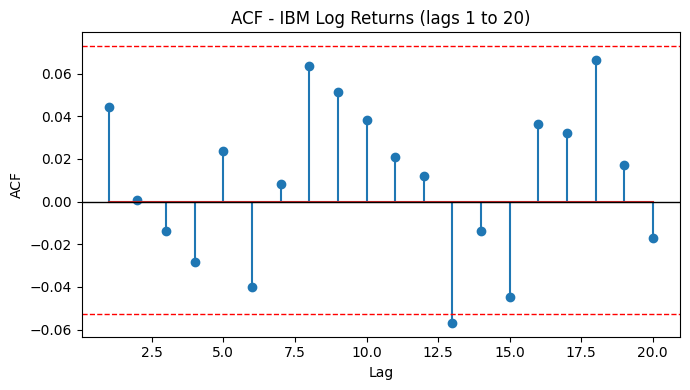

In [40]:
# Compute ACF with confidence intervals for log returns
acf_vals_log, confint_log = acf(log_ibm, nlags=lags, alpha=0.05)

# Plot without lag 0
plt.figure(figsize=(7,4))
plt.stem(range(1, lags+1), acf_vals_log[1:])  # skip lag 0
plt.axhline(0, color='black', linewidth=1)

# Confidence intervals (constant horizontal dashed lines, like plot_acf does)
plt.axhline(confint_log[1:,0].mean(), color='red', linestyle='dashed', linewidth=1)
plt.axhline(confint_log[1:,1].mean(), color='red', linestyle='dashed', linewidth=1)

plt.title(f'ACF - IBM Log Returns (lags 1 to {lags})')
plt.xlabel("Lag")
plt.ylabel("ACF")
plt.tight_layout()
plt.savefig('ACF_log_returns_no0.png', dpi=1200, bbox_inches='tight', transparent=True)
plt.show()

ACF of Simple Returns

The autocorrelation coefficients at different lags are very close to zero.

None of the lags show statistically significant autocorrelation, as they mostly fall within the confidence bands (dashed lines).

This confirms that there is no strong linear dependency between past and future returns, supporting the hypothesis that returns follow a random walk.

ACF of Log Returns

Similar to simple returns, the autocorrelations remain insignificant across all lags.

There is no evidence of strong serial correlation, meaning past log returns do not significantly predict future log returns.

This is consistent with financial theory, as logarithmic returns are often assumed to be uncorrelated over time, especially in efficient markets.



# Loading Data - Value-Weightd Index of U.S. Market


In [43]:
vw = df["vwrtn"]  # CRSP value-weighted market returns
log_vw = np.log1p(vw)

# Graphs of Simple and Log Returns

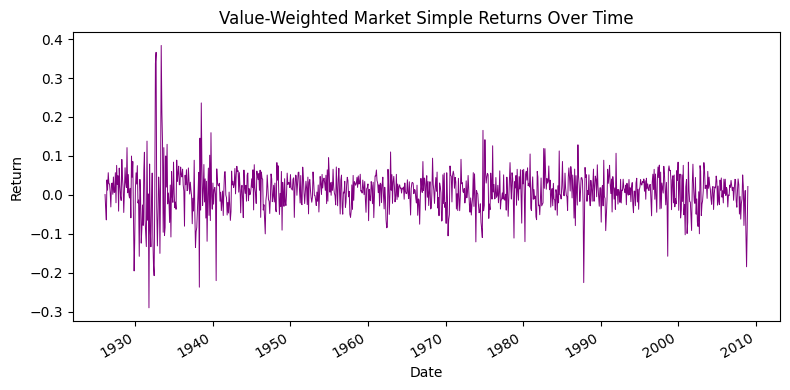

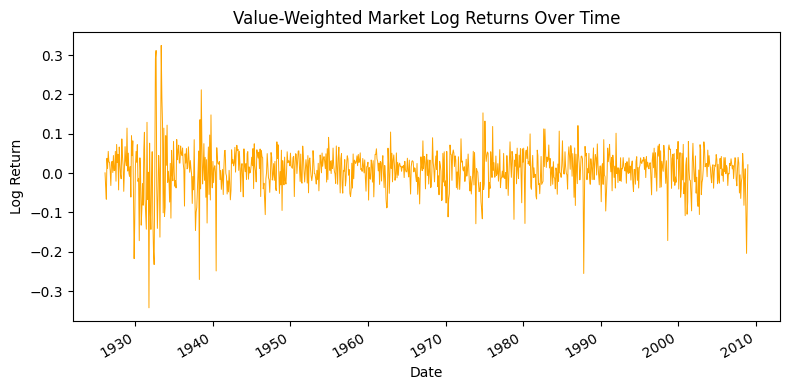

In [44]:
# Simple Return
plt.figure(figsize=(8,4))
vw.plot(color='purple', linewidth=0.7)
plt.title('Value-Weighted Market Simple Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Return')
plt.tight_layout()
plt.show()

# Log Return
plt.figure(figsize=(8,4))
log_vw.plot(color='orange', linewidth=0.7)
plt.title('Value-Weighted Market Log Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.tight_layout()
plt.show()

# Ljung-Box test

In [45]:
lb_vw_simple = acorr_ljungbox(vw, lags=[5], return_df=True)
print("Ljung-Box test Q(5) - VW Simple Returns:\n", lb_vw_simple)

lb_vw_log = acorr_ljungbox(log_vw, lags=[5], return_df=True)
print("Ljung-Box test Q(5) - VW Log Returns:\n", lb_vw_log)

Ljung-Box test Q(5) - VW Simple Returns:
    lb_stat  lb_pvalue
5  29.7107     0.0000
Ljung-Box test Q(5) - VW Log Returns:
    lb_stat  lb_pvalue
5  28.3786     0.0000


# ACF

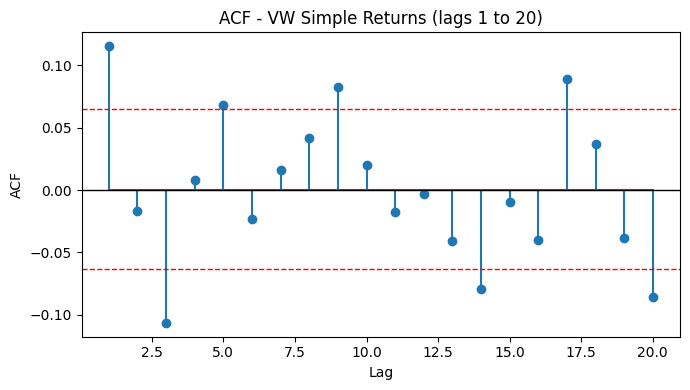

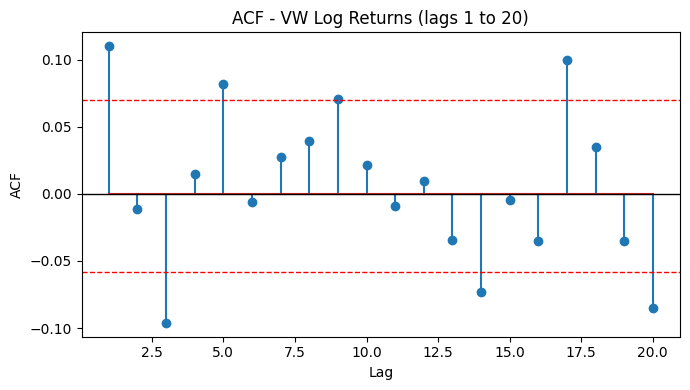

In [46]:
lags = 20

acf_vals_simple, confint_simple = acf(vw, nlags=lags, alpha=0.05)
acf_vals_log, confint_log = acf(log_vw, nlags=lags, alpha=0.05)

plt.figure(figsize=(7,4))
plt.stem(range(1, lags+1), acf_vals_simple[1:])
plt.axhline(0, color='black', linewidth=1)
plt.axhline(confint_simple[1:,0].mean(), color='red', linestyle='dashed', linewidth=1)
plt.axhline(confint_simple[1:,1].mean(), color='red', linestyle='dashed', linewidth=1)
plt.title(f'ACF - VW Simple Returns (lags 1 to {lags})')
plt.xlabel("Lag")
plt.ylabel("ACF")
plt.tight_layout()
plt.show()

plt.figure(figsize=(7,4))
plt.stem(range(1, lags+1), acf_vals_log[1:])
plt.axhline(0, color='black', linewidth=1)
plt.axhline(confint_log[1:,0].mean(), color='red', linestyle='dashed', linewidth=1)
plt.axhline(confint_log[1:,1].mean(), color='red', linestyle='dashed', linewidth=1)
plt.title(f'ACF - VW Log Returns (lags 1 to {lags})')
plt.xlabel("Lag")
plt.ylabel("ACF")
plt.tight_layout()
plt.show()

Several bars exceed the confidence bands, indicating statistically significant autocorrelation at those lags.

This suggests that past returns do influence future returns to some extent, contradicting the strict form of the Efficient Market Hypothesis (EMH).

The presence of autocorrelation could imply:

A momentum effect (short-term predictability).

Market inefficiencies, where past information still affects current prices.

Possible seasonality or cyclical patterns in returns.